In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.sequence import pad_sequences
from xml.etree import ElementTree
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from os import listdir
from os.path import isfile, join
from os import walk
import nltk
import numpy as np
from nltk.corpus import movie_reviews, stopwords
from collections import defaultdict
from nltk import tokenize
import random
from nltk.classify.scikitlearn import SklearnClassifier 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import time
import pprint
import math
import re
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding, Lambda
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers.merge import concatenate
plt.switch_backend('agg')
from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from bs4 import BeautifulSoup
from scipy.ndimage.interpolation import shift
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.style.use('ggplot')



In [57]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
path_to_articles = 'C:\\Users\\Jane\\Downloads\\articles'

In [8]:
def get_orientation_text(path):
    root = ElementTree.parse(path).getroot()
    ori = ""
    text = ""
    for c in root:
        if c.tag == 'orientation':
            ori = c
    for c in root:
        if c.tag == 'mainText':
            text = c
    return (text.text, ori.text)

In [9]:
def get_files_from_path(mypath):
    return [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [10]:
def clean_str(string):
    string = re.sub(r"\\", "", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    return string.strip().lower()

In [267]:
root = ElementTree.parse(path_to_articles + "\\"+'0000.xml').getroot()
root.getchildren()

[<Element 'author' at 0x0000019360A6D2C8>,
 <Element 'hyperlink' at 0x0000019360A6D3B8>,
 <Element 'hyperlink' at 0x0000019360A6DF98>,
 <Element 'hyperlink' at 0x0000019360A6DDB8>,
 <Element 'hyperlink' at 0x0000019360A6DCC8>,
 <Element 'hyperlink' at 0x0000019360A6DBD8>,
 <Element 'hyperlink' at 0x0000019360A6DAE8>,
 <Element 'hyperlink' at 0x0000019360A6D9F8>,
 <Element 'hyperlink' at 0x0000019360A6D908>,
 <Element 'hyperlink' at 0x0000019360A6D818>,
 <Element 'mainText' at 0x0000019360A6D728>,
 <Element 'orientation' at 0x0000019360A6D7C8>,
 <Element 'paragraph' at 0x0000019360A6D778>,
 <Element 'paragraph' at 0x0000019360A6D4A8>,
 <Element 'paragraph' at 0x0000019360A75E58>,
 <Element 'paragraph' at 0x0000019360A75C78>,
 <Element 'paragraph' at 0x0000019360A75B88>,
 <Element 'paragraph' at 0x0000019360A75A98>,
 <Element 'paragraph' at 0x0000019360A759A8>,
 <Element 'paragraph' at 0x0000019360A758B8>,
 <Element 'paragraph' at 0x0000019360A757C8>,
 <Element 'paragraph' at 0x000001936

In [12]:
list_touples = []
list_files = get_files_from_path(path_to_articles)
for f in list_files:
    list_touples.append(get_orientation_text(path_to_articles +'\\'+ f))

# Data prep CNN

In [24]:
MAX_SEQUENCE_LENGTH = 2000
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [244]:
texts = []
for t, l in list_touples:
    if t is None:
        texts.append('')
        continue
    text = BeautifulSoup(t)
    #print(text.get_text())
    texts.append(clean_str(str(text.get_text().encode())))
#texts = [clean_str(str(.get_text().encode())) for x in list_touples]


C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

# Mainstream -> 0 Hyperpartisan ->1

In [245]:
labels = [0 if x[1]=='mainstream' else 1 for x in list_touples]

In [82]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(len(word_index))

36791


In [23]:
len(sequences)

1627

In [246]:
data = pad_sequences(sequences, maxlen=2000)

labels = to_categorical(np.asarray(labels))



In [21]:
print(data)

[[   5 1073  975 ...  652 3799 1260]
 [   0    0    0 ... 3803    6 2082]
 [   0    0    0 ...    2 1842 1144]
 ...
 [   0    0    0 ... 1769  556  303]
 [   0    0    0 ...  141  303  303]
 [   0    0    0 ...  303  303  303]]


In [247]:
x_train, x_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=labels)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=y_train)

In [85]:
embeddings_index = {}
f = open('C:\\Users\\Jane\\Downloads\\glove.6B.100d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

#print('Total %s word vectors in Glove 6B 100d.' % len(embeddings_index))

Total 400000 word vectors in Glove 6B 100d.


In [86]:
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,weights=[embedding_matrix],
                            input_length=2000,trainable=True)

In [45]:
set(y_train)

{0, 1}

# CNN

In [198]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_cov1= Conv1D(128, 5, activation='relu')(embedded_sequences)
l_pool1 = MaxPooling1D(5)(l_cov1)
l_cov2 = Conv1D(128, 5, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(5)(l_cov2)
l_cov3 = Conv1D(128, 5, activation='relu')(l_pool2)
l_pool3 = MaxPooling1D(35)(l_cov3)  # global max pooling
l_flat = Flatten()(l_pool3)
l_dense = Dense(128, activation='relu')(l_flat)
preds = Dense(2, activation='softmax')(l_dense)

model_cnn = Model(sequence_input, preds)
model_cnn.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Convolutional neural network")
model_cnn.summary()
cp=ModelCheckpoint('model_cnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)

Convolutional neural network
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        (None, 2000)              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 2000, 100)         3679200   
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 1996, 128)         64128     
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 399, 128)          0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 395, 128)          82048     
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 79, 128)           0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 75, 128)   

In [46]:
history_conv=model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=15, batch_size=10,callbacks=[cp])

Train on 975 samples, validate on 326 samples
Epoch 1/15
975/975 [==============================] - 4s 4ms/step - loss: 0.6560 - acc: 0.6564 - val_loss: 0.3538 - val_acc: 0.8620

Epoch 00001: val_acc improved from -inf to 0.86196, saving model to model_cnn.hdf5
Epoch 2/15
975/975 [==============================] - 3s 3ms/step - loss: 0.3138 - acc: 0.8564 - val_loss: 0.3119 - val_acc: 0.8650

Epoch 00002: val_acc improved from 0.86196 to 0.86503, saving model to model_cnn.hdf5
Epoch 3/15
975/975 [==============================] - 3s 3ms/step - loss: 0.1774 - acc: 0.9282 - val_loss: 0.2386 - val_acc: 0.8988

Epoch 00003: val_acc improved from 0.86503 to 0.89877, saving model to model_cnn.hdf5
Epoch 4/15
975/975 [==============================] - 3s 3ms/step - loss: 0.1132 - acc: 0.9528 - val_loss: 0.1901 - val_acc: 0.9233

Epoch 00004: val_acc improved from 0.89877 to 0.92331, saving model to model_cnn.hdf5
Epoch 5/15
975/975 [==============================] - 3s 3ms/step - loss: 0.1120 

In [248]:
model_cnn.load_weights('C:\\Users\\Jane\\model_cnn.hdf5')
scores = model_cnn.evaluate(x_test, y_test)
print(scores)

326/326 [==============================] - 0s 673us/step
[0.46513001149965943, 0.8987730057692966]


In [249]:
pred_cnn = model_cnn.predict(x_test)
#print(pred_cnn)
#confusion_matrix(y_test, )

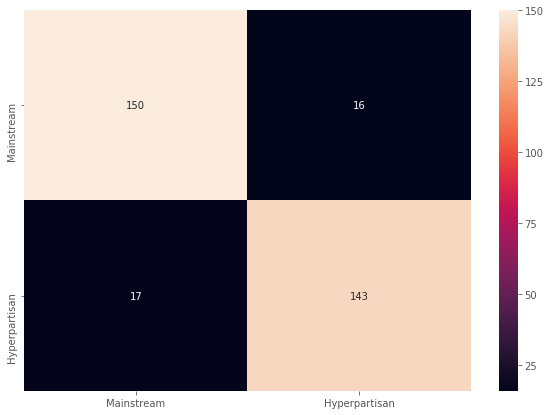

In [250]:
cm_cnn = confusion_matrix(y_test.argmax(axis=1), pred_cnn.argmax(axis=1))
df_cm = pd.DataFrame(cm_cnn, index = ['Mainstream', 'Hyperpartisan'],
                  columns = ['Mainstream', 'Hyperpartisan'])
plt.figure(figsize = (10,7))
s = sns.heatmap(df_cm, annot=True, fmt = 'd')

figure = s.get_figure()    
figure.savefig('cnn_conf.png', dpi=400)

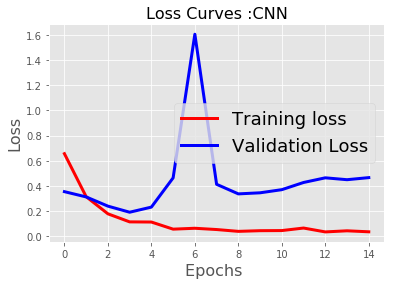

In [51]:
fig1 = plt.figure()
plt.plot(history_conv.history['loss'],'r',linewidth=3.0)
plt.plot(history_conv.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
fig1.savefig('loss_cnn.png')
plt.show()

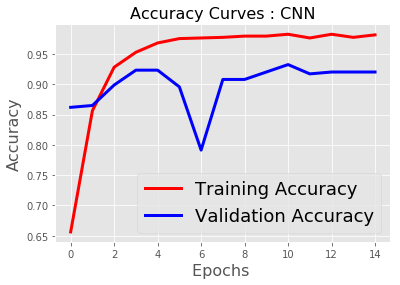

In [52]:
fig2=plt.figure()
plt.plot(history_conv.history['acc'],'r',linewidth=3.0)
plt.plot(history_conv.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : CNN',fontsize=16)
fig2.savefig('accuracy_cnn.png')
plt.show()

# Data prep HAN

In [53]:
MAX_SENT_LENGTH = 100
MAX_SENTS = 15
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [237]:
texts = []
reviews = []
for t, l in list_touples:
    if t is None:
        texts.append('')
        continue
    text = BeautifulSoup(t)
    text = clean_str(str(text.get_text().encode()))
    texts.append(text)
    sentences = tokenize.sent_tokenize(text)
    reviews.append(sentences)

labels = [0 if x[1]=='mainstream' else 1 for x in list_touples]

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

In [238]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)

data = np.zeros((len(texts), MAX_SENTS, MAX_SENT_LENGTH), dtype='int32')

for i, sentences in enumerate(reviews):
    for j, sent in enumerate(sentences):
        if j< MAX_SENTS:
            wordTokens = text_to_word_sequence(sent)
            k=0
            for _, word in enumerate(wordTokens):
                if k<MAX_SENT_LENGTH and tokenizer.word_index[word]<MAX_NB_WORDS:
                    data[i,j,k] = tokenizer.word_index[word]
                    k=k+1

In [66]:
word_index = tokenizer.word_index
print(len(word_index))

36791


In [239]:
labels = to_categorical(np.asarray(labels))

In [240]:
x_train, x_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=labels)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=y_train)

In [69]:
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,weights=[embedding_matrix],
                            input_length=2000,trainable=True)

# HAN (LSTM)

In [217]:
sentence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sentence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
sentEncoder = Model(sentence_input, l_lstm)

review_input = Input(shape=(MAX_SENTS,MAX_SENT_LENGTH), dtype='int32')
review_encoder = TimeDistributed(sentEncoder)(review_input)
l_lstm_sent = Bidirectional(LSTM(100))(review_encoder)
preds = Dense(2, activation='softmax')(l_lstm_sent)
model_han = Model(review_input, preds)

model_han.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Hierachical LSTM")
model_han.summary()
cp=ModelCheckpoint('model_han_.hdf5',monitor='val_acc',verbose=1,save_best_only=True)

Hierachical LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_48 (InputLayer)        (None, 15, 100)           0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 15, 200)           3840000   
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 200)               240800    
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 402       
Total params: 4,081,202
Trainable params: 4,081,202
Non-trainable params: 0
_________________________________________________________________


In [73]:
history_han=model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=15, batch_size=10,callbacks=[cp])

Train on 975 samples, validate on 326 samples
Epoch 1/15
975/975 [==============================] - 47s 48ms/step - loss: 0.5910 - acc: 0.6944 - val_loss: 0.4081 - val_acc: 0.8405

Epoch 00001: val_acc improved from -inf to 0.84049, saving model to model_han_.hdf5
Epoch 2/15
975/975 [==============================] - 43s 44ms/step - loss: 0.4259 - acc: 0.8010 - val_loss: 0.3484 - val_acc: 0.8620

Epoch 00002: val_acc improved from 0.84049 to 0.86196, saving model to model_han_.hdf5
Epoch 3/15
975/975 [==============================] - 42s 43ms/step - loss: 0.3349 - acc: 0.8595 - val_loss: 0.3286 - val_acc: 0.8620

Epoch 00003: val_acc did not improve from 0.86196
Epoch 4/15
975/975 [==============================] - 42s 43ms/step - loss: 0.2479 - acc: 0.9067 - val_loss: 0.3586 - val_acc: 0.8742

Epoch 00004: val_acc improved from 0.86196 to 0.87423, saving model to model_han_.hdf5
Epoch 5/15
975/975 [==============================] - 42s 43ms/step - loss: 0.1773 - acc: 0.9374 - val_los

In [241]:
model_han.load_weights('C:\\Users\\Jane\\model_han_.hdf5')

pred_han = model_han.predict(x_test)

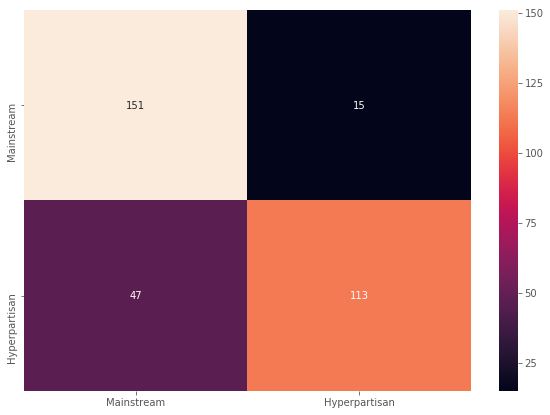

In [251]:
cm_han = confusion_matrix(y_test.argmax(axis=1), pred_han.argmax(axis=1))
df_cm_han = pd.DataFrame(cm_han, index = ['Mainstream', 'Hyperpartisan'],
                  columns = ['Mainstream', 'Hyperpartisan'])
plt.figure(figsize = (10,7))
s = sns.heatmap(df_cm_han, annot=True, fmt = 'd')

figure = s.get_figure()    
figure.savefig('han_conf.png', dpi=400)

In [243]:
scores = model_han.evaluate(x_test, y_test)
print(scores)

326/326 [==============================] - 3s 8ms/step
[0.4200004205290525, 0.8098159509202454]


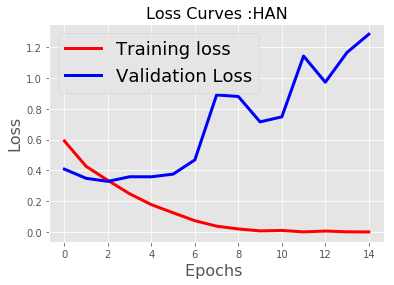

In [75]:
fig1 = plt.figure()
plt.plot(history_han.history['loss'],'r',linewidth=3.0)
plt.plot(history_han.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :HAN',fontsize=16)
fig1.savefig('loss_han.png')
plt.show()

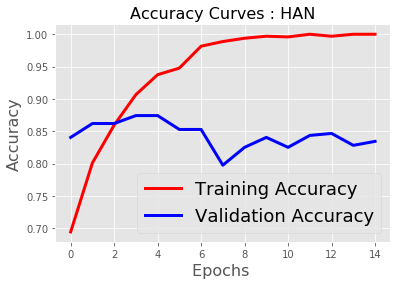

In [76]:
fig2=plt.figure()
plt.plot(history_han.history['acc'],'r',linewidth=3.0)
plt.plot(history_han.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : HAN',fontsize=16)
fig2.savefig('accuracy_han.png')
plt.show()

# RNN Bidirectional LSTM

In [252]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
preds = Dense(2, activation='softmax')(l_lstm)
model_rnn = Model(sequence_input, preds)
model_rnn.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Bidirectional LSTM")
model_rnn.summary()
cp=ModelCheckpoint('model_rnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)

Bidirectional LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        (None, 2000)              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 2000, 100)         3679200   
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 200)               160800    
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 402       
Total params: 3,840,402
Trainable params: 3,840,402
Non-trainable params: 0
_________________________________________________________________


In [88]:
t0 = time.time()
history_rnn=model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=15, batch_size=10,callbacks=[cp])
print("Training time: ", time.time()-t0)

Train on 975 samples, validate on 326 samples
Epoch 1/15
975/975 [==============================] - 707s 725ms/step - loss: 0.4992 - acc: 0.7528 - val_loss: 0.6156 - val_acc: 0.6963

Epoch 00001: val_acc improved from -inf to 0.69632, saving model to model_rnn.hdf5
Epoch 2/15
975/975 [==============================] - 706s 724ms/step - loss: 0.3176 - acc: 0.8636 - val_loss: 0.2725 - val_acc: 0.8926

Epoch 00002: val_acc improved from 0.69632 to 0.89264, saving model to model_rnn.hdf5
Epoch 3/15
975/975 [==============================] - 705s 723ms/step - loss: 0.2444 - acc: 0.9005 - val_loss: 0.3404 - val_acc: 0.8436

Epoch 00003: val_acc did not improve from 0.89264
Epoch 4/15
975/975 [==============================] - 704s 723ms/step - loss: 0.1677 - acc: 0.9395 - val_loss: 0.2214 - val_acc: 0.9172

Epoch 00004: val_acc improved from 0.89264 to 0.91718, saving model to model_rnn.hdf5
Epoch 5/15
975/975 [==============================] - 704s 722ms/step - loss: 0.1296 - acc: 0.9579 - 

In [253]:
model_rnn.load_weights('C:\\Users\\Jane\\model_rnn.hdf5')
scores = model_rnn.evaluate(x_test, y_test)
print(scores)

326/326 [==============================] - 23s 71ms/step
[0.281944194625766, 0.9447852760736196]


In [254]:
pred_rnn = model_rnn.predict(x_test)

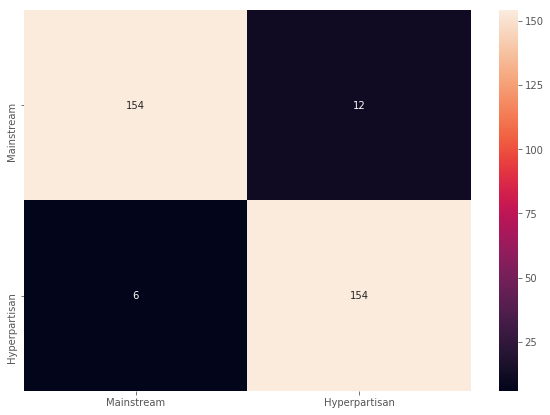

In [255]:
cm_rnn = confusion_matrix(y_test.argmax(axis=1), pred_rnn.argmax(axis=1))
df_cm_rnn = pd.DataFrame(cm_rnn, index = ['Mainstream', 'Hyperpartisan'],
                  columns = ['Mainstream', 'Hyperpartisan'])
plt.figure(figsize = (10,7))
s = sns.heatmap(df_cm_rnn, annot=True, fmt = 'd')

figure = s.get_figure()    
figure.savefig('rnn_conf.png', dpi=400)

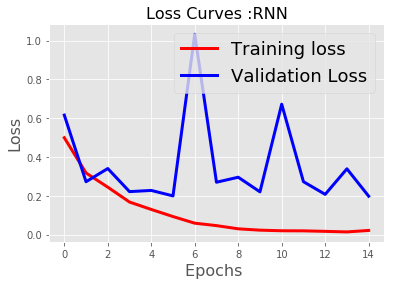

In [195]:
fig1 = plt.figure()
plt.plot(history_rnn.history['loss'],'r',linewidth=3.0)
plt.plot(history_rnn.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN',fontsize=16)
fig1.savefig('loss_rnn.png')
plt.show()

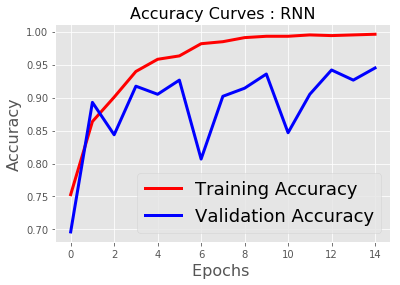

In [193]:
fig2=plt.figure()
plt.plot(history_rnn.history['acc'],'r',linewidth=3.0)
plt.plot(history_rnn.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : RNN',fontsize=16)
fig2.savefig('accuracy_rnn.png')
plt.show()

# Recurrent CNN

In [106]:
MAX_SEQUENCE_LENGTH = 2000
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
HIDDEN_DIM_1 = 200
HIDDEN_DIM_2 = 100

In [256]:
texts = []
for t, l in list_touples:
    if t is None:
        texts.append('')
        continue
    text = BeautifulSoup(t)
    #print(text.get_text())
    texts.append(clean_str(str(text.get_text().encode())))
#texts = [clean_str(str(.get_text().encode())) for x in list_touples]
labels = [0 if x[1]=='mainstream' else 1 for x in list_touples]

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Jane\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Jane\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning

In [95]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(len(word_index))

36791


In [257]:
data = pad_sequences(sequences, maxlen=2000)
labels = to_categorical(np.asarray(labels))

In [ ]:
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,weights=[embedding_matrix],
                            input_length=2000,trainable=True)

In [258]:
x_train, x_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=labels)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=y_train)

In [259]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
left_context = Input(shape = (MAX_SEQUENCE_LENGTH, ), dtype = "int32")
right_context = Input(shape = (MAX_SEQUENCE_LENGTH, ), dtype = "int32")

embedded_sequences = embedding_layer(sequence_input)
l_embedded = embedding_layer(left_context)
r_embedded = embedding_layer(right_context)
#l_lstm = Bidirectional(LSTM(100))(embedded_sequences)

forward = LSTM(HIDDEN_DIM_1, return_sequences = True)(l_embedded) # See equation (1).
backward = LSTM(HIDDEN_DIM_1, return_sequences = True, go_backwards = True)(r_embedded) # See equation (2).
# Keras returns the output sequences in reverse order.
backward = Lambda(lambda x: K.reverse(x, axes = 1))(backward)
together = concatenate([forward, embedded_sequences , backward], axis = 2) # See equation (3).

conv_l = Conv1D(HIDDEN_DIM_2, kernel_size = 1, activation = "tanh")(together) # See equation (4).

pool_rnn = Lambda(lambda x: K.max(x, axis = 1), output_shape = (HIDDEN_DIM_2, ))(conv_l) # See equation (5).


preds = Dense(2, input_dim = HIDDEN_DIM_2, activation = "softmax")(pool_rnn)
model_crnn = Model(inputs = [sequence_input, left_context, right_context], outputs = preds)
model_crnn.compile(loss='categorical_crossentropy',
              optimizer='adadelta',#######
              metrics=['acc'])

print("Convolutional LSTM")
model_crnn.summary()
cp=ModelCheckpoint('model_C_rnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)

Convolutional LSTM
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_51 (InputLayer)           (None, 2000)         0                                            
__________________________________________________________________________________________________
input_50 (InputLayer)           (None, 2000)         0                                            
__________________________________________________________________________________________________
input_52 (InputLayer)           (None, 2000)         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 2000, 100)    3679200     input_50[0][0]                   
                                                                 input_51[0][0]           

In [260]:
#tr1 = x_train[:-1]
#tr1.append([MAX_NB_WORDS])
#tr = x_train[1:]
#tr1.append([MAX_NB_WORDS])
temp = np.zeros(2000)
temp[:2000] = MAX_NB_WORDS
tr_left_context_as_array = np.concatenate(([temp], x_train[:-1]))
tr_right_context_as_array = np.concatenate((x_train[1:], [temp]))

val_left_context_as_array = np.concatenate(([temp], x_val[:-1]))
val_right_context_as_array = np.concatenate((x_val[1:], [temp]))


In [181]:
tr_left_context_as_array

array([[2.000e+04, 2.000e+04, 2.000e+04, ..., 2.000e+04, 2.000e+04,
        2.000e+04],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.819e+03, 1.000e+00,
        5.600e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.300e+01, 1.000e+00,
        5.880e+02],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.700e+02, 4.720e+02,
        1.760e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.400e+01, 5.000e+00,
        1.139e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.614e+03, 6.000e+00,
        9.192e+03]])

In [178]:
tr_left_context_as_array

array(None, dtype=object)

In [182]:
history_rcnn = model.fit([x_train, tr_left_context_as_array, tr_right_context_as_array], y_train, validation_data=([x_val, val_left_context_as_array, val_right_context_as_array], y_val),epochs=15, batch_size=10,callbacks=[cp])

Train on 975 samples, validate on 326 samples
Epoch 1/15
975/975 [==============================] - 741s 760ms/step - loss: 0.6259 - acc: 0.6615 - val_loss: 0.4747 - val_acc: 0.7822

Epoch 00001: val_acc improved from -inf to 0.78221, saving model to model_C_rnn.hdf5
Epoch 2/15
975/975 [==============================] - 729s 747ms/step - loss: 0.3951 - acc: 0.8431 - val_loss: 0.3874 - val_acc: 0.8129

Epoch 00002: val_acc improved from 0.78221 to 0.81288, saving model to model_C_rnn.hdf5
Epoch 3/15
975/975 [==============================] - 730s 749ms/step - loss: 0.2507 - acc: 0.9241 - val_loss: 0.2721 - val_acc: 0.8957

Epoch 00003: val_acc improved from 0.81288 to 0.89571, saving model to model_C_rnn.hdf5
Epoch 4/15
975/975 [==============================] - 714s 733ms/step - loss: 0.1660 - acc: 0.9559 - val_loss: 0.3244 - val_acc: 0.8466

Epoch 00004: val_acc did not improve from 0.89571
Epoch 5/15
975/975 [==============================] - 718s 736ms/step - loss: 0.1087 - acc: 0.9

In [184]:
test_left_context_as_array = np.concatenate(([temp], x_test[:-1]))
test_right_context_as_array = np.concatenate((x_test[1:], [temp]))
testt = [x_test,test_left_context_as_array, test_right_context_as_array]
scores = model_crnn.evaluate(testt, y_test)
print(scores)

326/326 [==============================] - 24s 73ms/step
[0.15355710301296843, 0.944785275707947]


326/326 [==============================] - 24s 73ms/step
[0.15355710301296843, 0.944785275707947]


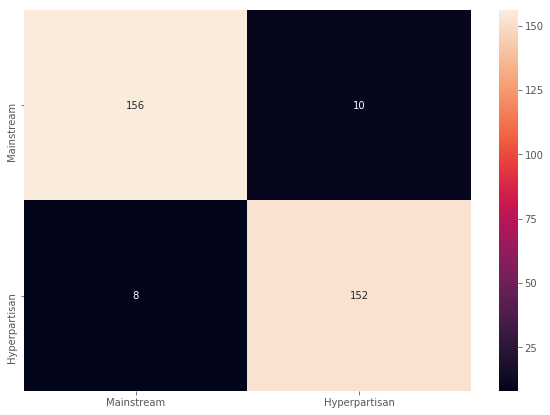

In [262]:
model_crnn.load_weights('C:\\Users\\Jane\\model_C_rnn.hdf5')
test_left_context_as_array = np.concatenate(([temp], x_test[:-1]))
test_right_context_as_array = np.concatenate((x_test[1:], [temp]))
testt = [x_test,test_left_context_as_array, test_right_context_as_array]
scores = model_crnn.evaluate(testt, y_test)
print(scores)

pred_crnn = model_crnn.predict(testt)

cm_crnn = confusion_matrix(y_test.argmax(axis=1), pred_crnn.argmax(axis=1))
df_cm_crnn = pd.DataFrame(cm_crnn, index = ['Mainstream', 'Hyperpartisan'],
                  columns = ['Mainstream', 'Hyperpartisan'])
plt.figure(figsize = (10,7))
s = sns.heatmap(df_cm_crnn, annot=True, fmt = 'd')

figure = s.get_figure()    
figure.savefig('crnn_conf.png', dpi=400)

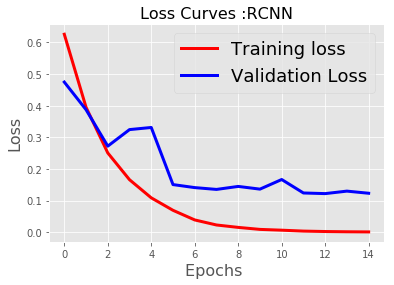

In [186]:
fig1 = plt.figure()
plt.plot(history_rcnn.history['loss'],'r',linewidth=3.0)
plt.plot(history_rcnn.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RCNN',fontsize=16)
fig1.savefig('loss_rcnn.png')
plt.show()

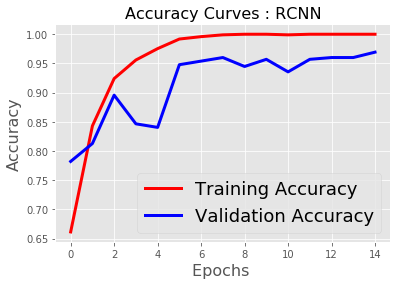

In [196]:
fig2=plt.figure()
plt.plot(history_rcnn.history['acc'],'r',linewidth=3.0)
plt.plot(history_rcnn.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : RCNN',fontsize=16)
fig2.savefig('accuracy_rcnn.png')
plt.show()